# E-mail spam classification Project.

In [171]:

from google.colab import drive
drive.mount

<function google.colab.drive.mount(mountpoint, force_remount=False, timeout_ms=120000, readonly=False)>

In [172]:
path = "/content/drive/MyDrive/DS programming assignments /Spam classification project/SPAM text message 20170820 - Data.csv"

### Import necessary libraries.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [174]:
df = pd.read_csv(path)

In [175]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Check for null values

In [176]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [177]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

### Convert Target variable into classes.

In [178]:
df.Category = df.Category.map({'ham':0,'spam':1})

### Split the dataset into train & test datas.

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
x_train,x_test,y_train,y_test = train_test_split(df.Message , df.Category, test_size=0.2,random_state=10)

In [181]:
x_train

5281               And how you will do that, princess? :)
1300    Great to hear you are settling well. So what's...
5128    Wot about on wed nite I am 3 then but only til 9!
1808      Do have a nice day today. I love you so dearly.
856     Talk sexy!! Make new friends or fall in love i...
                              ...                        
1180                  To day class is there are no class.
3441                       What time you thinkin of goin?
1344    Crazy ar he's married. Ü like gd looking guys ...
4623                They finally came to fix the ceiling.
1289                             Happy new year to u too!
Name: Message, Length: 4457, dtype: object

In [182]:
y_train

5281    0
1300    0
5128    0
1808    0
856     1
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: Category, Length: 4457, dtype: int64

### Vectorize the word data available in the Xs

In [183]:
from sklearn.feature_extraction.text import CountVectorizer

In [184]:
cvc = CountVectorizer()

In [185]:
training_data = cvc.fit_transform(x_train).toarray()
testing_data = cvc.transform(x_test).toarray()

In [186]:
training_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [187]:
df_transformed = pd.DataFrame(training_data, columns = cvc.get_feature_names_out())
df_transformed.head()

,00,000,008704050406,0089,0121,01223585236,01223585334,02,0207,02072069400,...,zaher,zealand,zebra,zed,zeros,zhong,zoe,zogtorius,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Fit ML model

In [188]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [189]:
NB.fit(training_data,y_train)

MultinomialNB()

### Predict using the fitted ML model

In [190]:
y_pred = NB.predict(testing_data)

In [191]:
pd.DataFrame({"Actual":y_test,"prediction":y_pred})

,Actual,prediction
4635,0,0
2279,0,0
4545,0,0
5084,0,0
5298,0,0
...,...,...
2357,0,0
1174,0,0
192,0,0
3606,0,0


### Check accuracy

In [192]:
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score

In [193]:
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))

Accuracy:  0.9829596412556054
Recall:  0.9020979020979021
Precision:  0.9626865671641791
f1 score:  0.9314079422382671


### Plot a Confusion Matrix to compare the actual and predicted values.

In [194]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [195]:
cm = pd.DataFrame(cm)

In [196]:
cm

,0,1
0,967,5
1,14,129


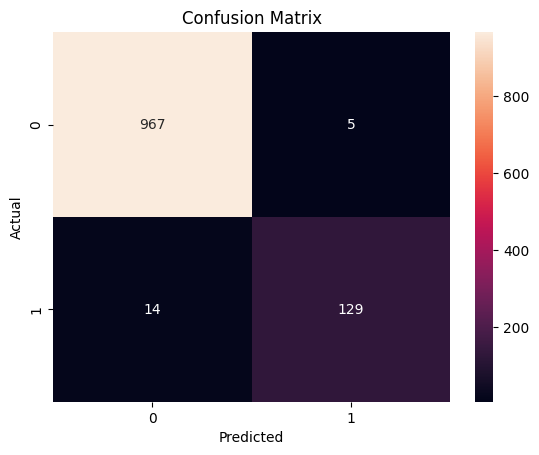

In [197]:
sns.heatmap(cm, annot=True, fmt = 'g')

plt.title("Confusion Matrix")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()